# Machine Learning #

**Lo que ha sido siempre la Estadística de toda la vida, que durante los 80 se llamó Inteligencia Artificial**

* Una serie de técnicas de análisis y manipulación de datos que sirven para obtener patrones predecibles en datos reales.

* ML Supervisado

    * Los datos vienen con atributos objetivo. Queremos modelar o simplificar los datos para entender la relación entre datos y atributos y conocer mejor el problema. 
    
    * Algoritmos de regresión y clasificación.
    
* ML No supervisado

    * Queremos encontrar estructura en nuestros datos.
    
    * Clustering, estimación de densidad...

## Scikit-learn ##

* http://scikit-learn.org

* Python cuenta con una serie de módulos llamados scikits.

* Scikit-learn (sklearn) es el más conocido.

* Es un toolkit bastante completo, rápido y una referencia en ML.

* [Un buen tutorial del que he sacado parte de este ejemplo](https://github.com/jakevdp/sklearn_pycon2015)

### Comprimir una imagen ###

Tomemos por ejemplo esta imagen de ejemplo de un templo en China

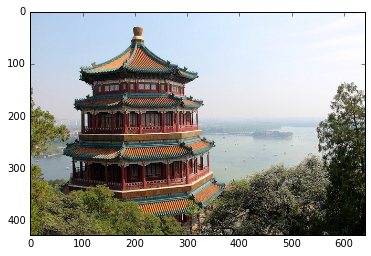

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.datasets import load_sample_image
china = load_sample_image("china.jpg")
fig = plt.figure(1)
ax = fig.add_subplot(1,1,1)
ax.imshow(china)

Queremos comprimir esta imagen para reducir el tamaño que cuesta almacenarlo en memoria. Una de las estrategias de compresión es reducir la paleta de colore
s.

En cualquier imagen, la paleta de de colores es una combinación de 256 tonos de rojo, verde y azul; entonces el espacio de colores tiene 3 dimensiones y $256^3$ (unos 16.7 millones) colores posibles. El color (0,0,0) es el negro, mientras que el (255,255,255) es el blanco.

Una estrategia para comprimir imagenes parte de la base que nuestro sentido de la vista no percibe todos los colores por igual ni la naturaleza usa todos los colores a la vez. Hay colores que nuesto cerebro no percibe bien (especialmente si somos hombres) y hay colores poco frecuentes, como tonos puros de azul o rojo.

Entonces se puede reducir el número de colores posibles de $256^3$ a menos de 100 sin que nuestra percepción encuentre la imagen aberrante. En los albores de la computación se utilizaban paleatas para ahorrar memoria y poder representar gráficos de manera más eficiente. Era el caso de la SEGA Master System, una consola que apareció en el año 1986, y que disponía de esta paleta de 32 colores.

![](fig/Screen_color_test_SEGAMasterSystem.png)

El objetivo es obtener una paleta lo suficientemente buena como para que basten 32 colores. Es una práctica habitual en machine learning: obtener los casos más significativos (los colores de una paleta para una imagen) de entre todas las posibilidades (los 16 millones y pico de colores posibles)

Primero vamos a explorar la imagen sólo como si fueran un montón de datos. Cualquier imagen es un array con 3 dimensiones, una para la dirección horizontal, otra para la dirección vertical y una tercera para los 3 colores. El primer paso es obviar las dimensiones espaciales y convertir la imagen en una *tira* de numeros

In [15]:
iso = china.reshape(-1,3)
print(iso.shape)
print(iso.nbytes)

(273280, 3)
819840


Como se ha dicho anteriormente, hay colores más o menos posibles. Sabiendo que tenemos tres posibles canales, representaremos todos los píxeles en función de dónde están situados en el espacio de color. Para ello los proyectaremos en las combinaciones de dos canales rojo-verde, rojo-azul y verde-azul.

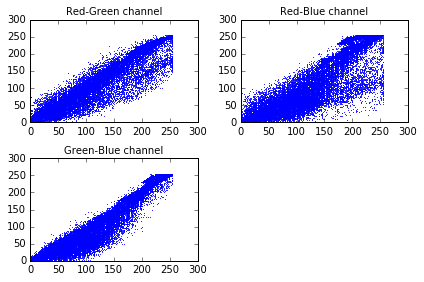

In [16]:
fig = plt.figure(2)
rg = fig.add_subplot(2,2,1)
rb = fig.add_subplot(2,2,2)
gb = fig.add_subplot(2,2,3)

rg.plot(iso[::5,0], iso[::5,1], 'b.', markersize=1)
rg.set_title('Red-Green channel', fontsize=10)
rb.plot(iso[::5,0], iso[::5,2], 'b.', markersize=1)
rb.set_title('Red-Blue channel', fontsize=10)
gb.plot(iso[::5,1], iso[::5,2], 'b.', markersize=1)
gb.set_title('Green-Blue channel', fontsize=10)

fig.tight_layout()

Como se puede ver, la mayoría de píxeles siguen un patrón desde el negro al blanco, pasando por combinaciones que tienden al gris (iguales cantidades de rojo verde y azul). Los colores más poco frecuentes son los rojos puros y los verdes puros.

Una paleta eficiente se conseguirá resumiendo todos estos píxeles en unos cuantos colores característicos, que se aproximan a los más frecuentes. El algoritmo que permite realizar esta tarea se llama [KMeans](https://es.wikipedia.org/wiki/K-means).

Se trata de un algoritmo de clustering que en Scikit-Learn se usa como sigue. Primero se importa el modelo y luego se configuran el número de centroides deseados. Cada centroide será un color característico. Es también un algoritmo bastante pesado que requiere bastante esfuerzo de cálculo, así que pasaremos un `-1` al parámetro `n_jobs` para que use todos los colores disponibles.

Al utilizar el método `fit_predict` el modelo calculará todos los centroides y dará para cada píxel el centroide más cercano (`labels`)

In [4]:
from sklearn.cluster import KMeans
model = KMeans(32, n_jobs=-1)
labels = model.fit_predict(iso)
colors = model.cluster_centers_

A continuación representaremos sobre la anterior figura los centroides como puntos en rojo. Como se aprecia perfectamente, hay mayor densidad de centroides donde hay colores más probables.

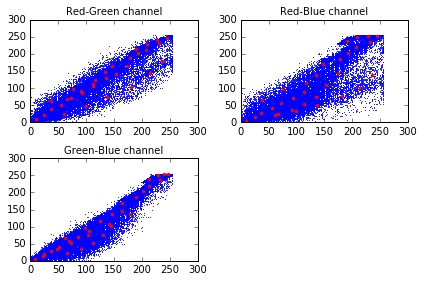

In [5]:
fig = plt.figure(3)
rg = fig.add_subplot(2,2,1)
rb = fig.add_subplot(2,2,2)
gb = fig.add_subplot(2,2,3)

rg.plot(iso[::5,0], iso[::5,1], 'b.', markersize=1)
rg.set_title('Red-Green channel', fontsize=10)
rb.plot(iso[::5,0], iso[::5,2], 'b.', markersize=1)
rb.set_title('Red-Blue channel', fontsize=10)
gb.plot(iso[::5,1], iso[::5,2], 'b.', markersize=1)
gb.set_title('Green-Blue channel', fontsize=10)

rg.plot(colors[:,0], colors[:,1], 'r.')
rb.plot(colors[:,0], colors[:,2], 'r.')
gb.plot(colors[:,1], colors[:,2], 'r.')

fig.tight_layout()

Finalmente podemos reconstruir la imagen utilizando los valores ajustados al modelo, para ello tenemos que pasar de la representación bidimensional que hemos utilizaro para el modelo a la tridimensional que requiere la imagen.*

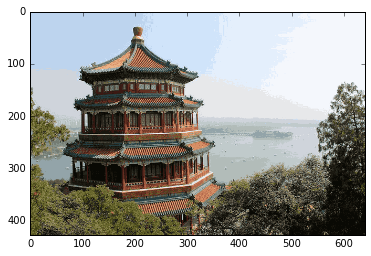

In [6]:
new_image = colors[labels].reshape(china.shape).astype(np.uint8)
fig = plt.figure(4)
ax = fig.add_subplot(1,1,1)
ax.imshow(new_image)

### Distinguir entre el Iris Virginica y el Iris Versicolor ###

Volvemos al Iris, la flor preferida del Machine Learning.


In [7]:
import pandas as pd
iris = pd.read_csv('data/iris.csv')
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Un problema clásico de predicción es poder distinguir entre la Iris Virginica y la Iris Versicolor. Los datos tomados para cada flor son la longitud y la anchura del sépalo y el pétalo respectivamente. Distinguir la setosa de la virginica y versicolor es sencillo, puesto que la setosa tiene un sépalo claramente más corto y más ancho que las otras dos variedades.

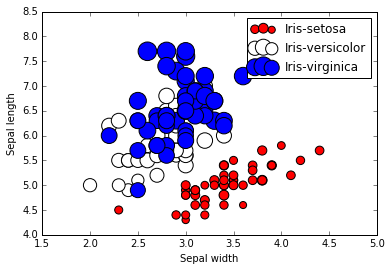

In [13]:
fig = plt.figure(5)
ax = fig.add_subplot(1,1,1)
for s, c in zip(iris.groupby('Name'), ['r', 'w', 'b']):
    s[1].plot.scatter(x='SepalWidth',
                      y='SepalLength',
                      c=c,
                      s=50*s[1]['PetalLength'],
                      ax=ax,
                      label=s[0])
    
plt.xlabel('Sepal width')
plt.ylabel('Sepal length')

En cambio, no parece que haya una manera obvia de distinguir la versicolor de la virginica por sus propiedades. Los pétalos y los sépalos tienen un aspecto parecido: cuando son largos son anchos y al contrario. Entonces no es trivial entrenar un modelo que prediga, dadas las características de una flor, su variedad.

Lo que sucede es que estamos explorando sólo unas cuantas combinaciones dentro del espacio de posibles medidas. Si proyectamos las medidas como en el caso anterior nos limitamos a combinaciones entre dos de los cuatro parámetros. Esta limitación existe sólo en nuestros cerebros porque tenemos serias dificultades para visualizar espacios con más de tres dimensiones. En el caso de estos datos, el número de dimensiones asciende a 4.

Pero hay algoritmos que permiten resolver este entuerto. La pregunta es la siguiente. ¿Hay algún subespacio de dos dimensiones (una proyección), combinación de las 4 dimensiones, que permita separar las características de la virginica de la setosa? La respuesta, si es afirmativa, se puede encontrar con la descomposición en componentes principales (Principal Component Analysis o PCA).

Para Scikit-Learn, PCA es un algoritmo de descomposición. Le cargamos las medidas como una matriz de 4 filas y una columna por cada medida

In [9]:
from sklearn.decomposition import PCA
data = np.vstack((iris.SepalLength.as_matrix(),
                  iris.SepalWidth.as_matrix(),
                  iris.PetalLength.as_matrix(),
                  iris.PetalWidth.as_matrix())).T

pca = PCA(n_components=2)
X_r = pca.fit(data).transform(data)
print('Components', pca.components_)
print('Explained variance', pca.explained_variance_ratio_)

Components [[ 0.36158968 -0.08226889  0.85657211  0.35884393]
 [-0.65653988 -0.72971237  0.1757674   0.07470647]]
Explained variance [ 0.92461621  0.05301557]


Lo que obtenemos es que las dos medidas que separan bien la virginica de la versicolor son

$$ m_1 = 0.36 s_l + -0.08 s_w + 0.86 p_l + 0.36 p_w $$
$$ m_2 = -0.66 s_l + -0.73 s_w + 0.18 p_l + 0.07 p_w $$

donde $s_l$ y $s_w$ son la longitud y la anchura del sépalo y $p_l$ y $p_w$ son la longitud y la anchura del pétalo respectivamente.

Representando todas las mediciones utilizando estas dos nuevas variables obtenemos que sí es posible (aproximadamente) separar la virginica de la versicolor.

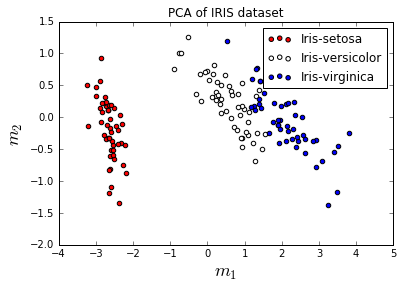

In [19]:
fig = plt.figure(6)
ax = fig.add_subplot(1,1,1)
projected = pd.DataFrame(
    {'Axis1': X_r[:,0],
     'Axis2': X_r[:,1],
     'Name': iris.Name.as_matrix()
    }
)

for (group, data), c in zip(projected.groupby('Name'), 'rwb'):
    plt.scatter(data.Axis1, data.Axis2, c=c, label=group)

    
ax.set_xlabel(r'$m_1$', fontsize=18)
ax.set_ylabel(r'$m_2$', fontsize=18)
plt.legend()
plt.title('PCA of IRIS dataset')


En estas nuevas medidas derivadas, la combinación de $m_1$ y $m_2$ de la virginica es proporcionalmente mayor que la versicolor. En este nuevo subespacio la setosa es aún más fácil de distinguir, especialmente tomando la medida $m_1$.

Podemos también volver a utilizar el algoritmo KMeans par clasificar automáticamente las tres variedades.

Accuracy 0.8866666666666667


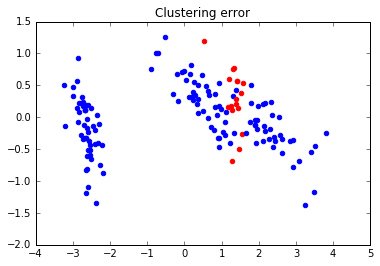

In [11]:
data = np.vstack((projected.Axis1.as_matrix(),
                  projected.Axis2.as_matrix())).T

model = KMeans(3, n_jobs=-1)

labels = model.fit_predict(data)
label_name_map = {
    1: 'Iris-setosa',
    2: 'Iris-versicolor',
    0: 'Iris-virginica'
                 } 
projected['Label'] = [label_name_map[l] for l in labels]

fig = plt.figure(7)
ax = fig.add_subplot(1,1,1)

right = 0
wrong = 0
for i, (ax1, ax2, name, label) in projected.iterrows():
    if name != label:
        ax.scatter(ax1, ax2, color='r')
        wrong += 1
    elif name == label:
        ax.scatter(ax1, ax2, color='b')
        right += 1
        
print('Accuracy', right/(wrong+right))
            
plt.title('Clustering error')

En rojo se ven los errores de clasificación de las tres variedades que comete el KMeans, con un porcentaje de acierto de casi el 90%. No es desastroso, pero es claramente mejorable.